       RefSt  Sensor_O3       Temp     RelHum
0  60.398802  72.330534  29.463788  60.127298
1  33.249639  40.651934  34.649167  41.155000
2  20.752067  40.651934  37.619274  28.983520
3  39.086722  63.512748  29.758056  51.308333
4  33.739582  52.379603  27.663231  48.696379
       RefSt  Sensor_O3       Temp     RelHum
0  60.398802  72.330534  29.463788  60.127298
1  33.249639  40.651934  34.649167  41.155000
2  20.752067  40.651934  37.619274  28.983520
3  39.086722  63.512748  29.758056  51.308333
4  33.739582  52.379603  27.663231  48.696379
RefSt        float64
Sensor_O3    float64
Temp         float64
RelHum       float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RefSt      327 non-null    float64
 1   Sensor_O3  327 non-null    float64
 2   Temp       327 non-null    float64
 3   RelHum     327 non-null    float64
dtypes

<ipython-input-1-a6db2f0b3ed6>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]


Correlation:  0.7022196523351374


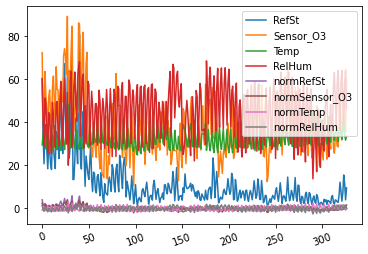

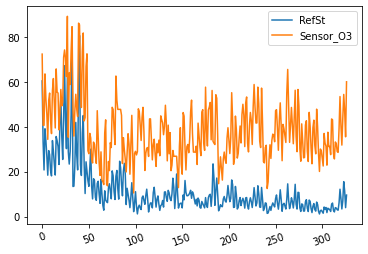

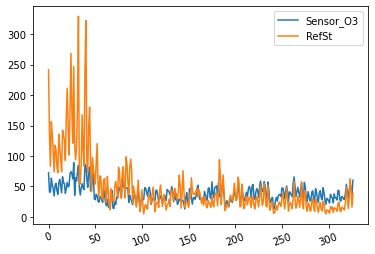

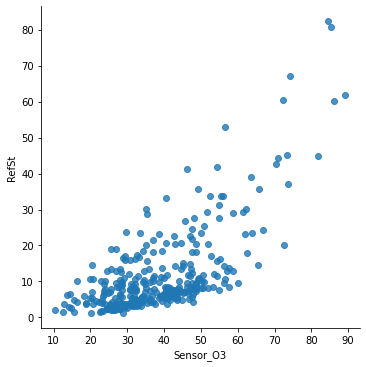

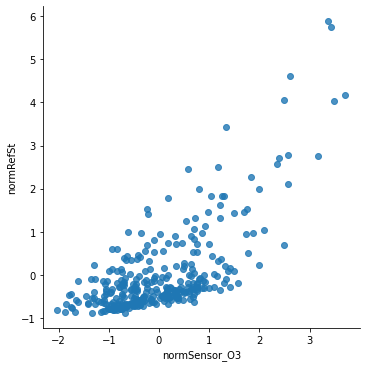

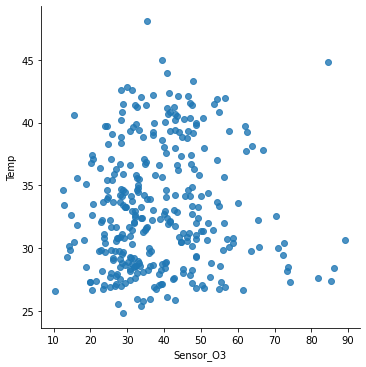

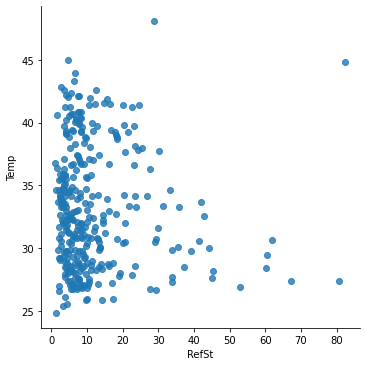

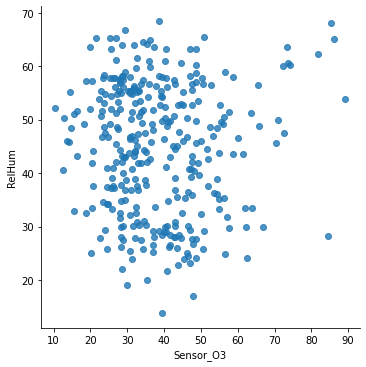

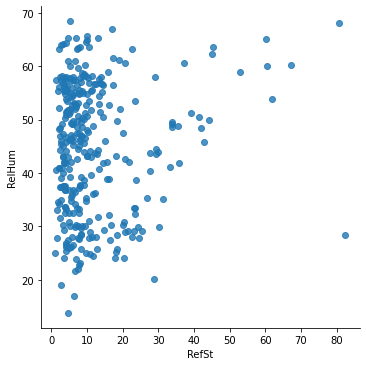

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime

#%%
# Read sensor data
sensor = pd.read_csv("PM.csv")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'RefSt': sensor["RefSt"], 'Sensor_O3': sensor["Sensor_O3"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})

# Split main dataset and build train and test datasets
X = df[['Sensor_O3', 'Temp', 'RelHum']]
Y = df['RefSt']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'RefSt': Y_train, 'Sensor_O3': X_train["Sensor_O3"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'RefSt': Y_test, 'Sensor_O3': X_test["Sensor_O3"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    print("* RMSE =", mean_squared_error(y_true, y_pred))
    print("* MAE =", mean_absolute_error(y_true, y_pred))

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normRefSt"] = normalize(df["RefSt"])
df["normSensor_O3"] = normalize(df["Sensor_O3"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Sensor_O3 = sensor[["Temp", "Sensor_O3"]]
print(Temp_Sensor_O3.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["RefSt", "Sensor_O3"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Sensor_O3_RefSt_factor = df[["Sensor_O3", "RefSt"]]
Sensor_O3_RefSt_factor["RefSt"] = 4*Sensor_O3_RefSt_factor["RefSt"]
Sensor_O3_RefSt_factor.plot()
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Sensor_O3', y = 'RefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normSensor_O3', y = 'normRefSt', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Sensor_O3
sns.lmplot(x = 'Sensor_O3', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to RefSt
sns.lmplot(x = 'RefSt', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["RefSt"].tolist()
x = pd.Series(x)

y = df["Sensor_O3"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -46.67058962873977
Coefficients: 
 [0.64188817 0.62920224 0.32544893]
Loss functions:
* R-squared = -7.0504297458345135
* RMSE = 86.69883399559625
* MAE = 8.113715440773081
Intercept: 
 [12.61712639]
Coefficients: 
 [8.78767099 0.38360182 1.2015402 ]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -3.7779554752364763
* RMSE = 51.456031747897285
* MAE = 6.303384093092779
Correlation:  0.903143249690284


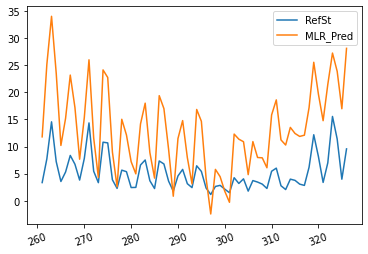

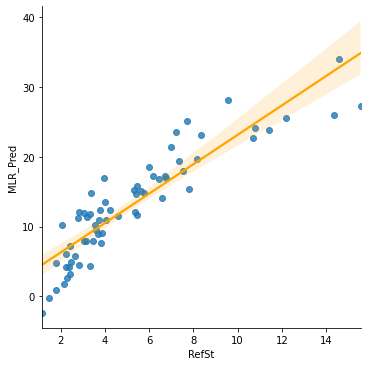

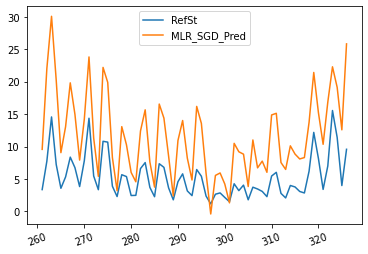

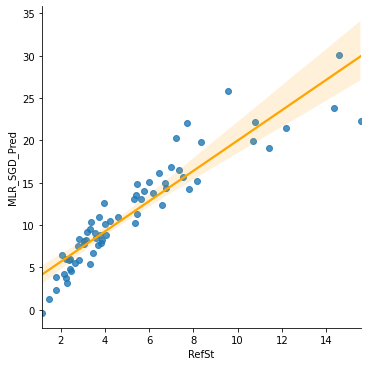

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Sensor_O3"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["RefSt", "MLR_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["RefSt", "MLR_SGD_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["MLR_SGD_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["MLR_Pred"].corr(x)
print("Correlation: ", corr)

         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
261   3.352684  32.988701  34.780000  47.339710  11.794779      9.558679   
262   7.728218  55.011299  40.833618  33.277778  25.163334     22.023218   
263  14.564075  65.508571  32.245977  56.434195  34.034277     30.089609   
264   7.223171  48.565657  29.370145  63.183478  23.545887     20.228234   
265   3.556766  33.050847  35.026048  41.859581  10.205982      9.055297   
..         ...        ...        ...        ...        ...           ...   
322   7.004743  43.855114  36.249425  52.779023  21.464585     16.853196   
323  15.555511  54.378531  41.898271  38.882997  27.251262     22.298464   
324  11.403190  46.968839  34.132113  58.198873  23.894915     19.132447   
325   3.978614  35.509915  31.692015  64.261977  16.977483     12.576146   
326   9.571165  60.005650  33.561563  46.583750  28.123969     25.836321   

      KNN_Pred  
261   9.656463  
262  14.759448  
263  33.156805  
264  14.704104  
26

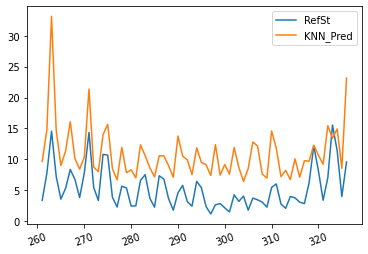

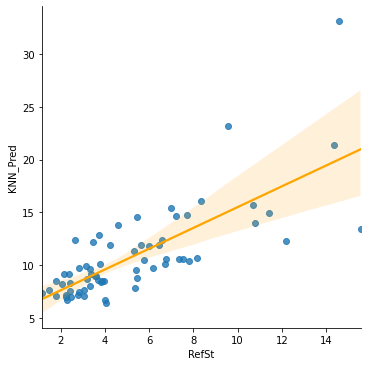

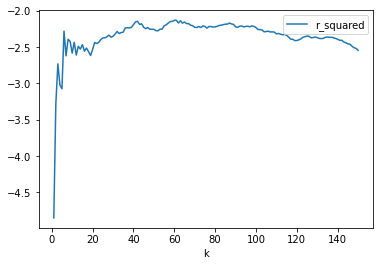

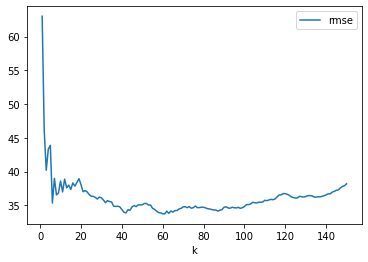

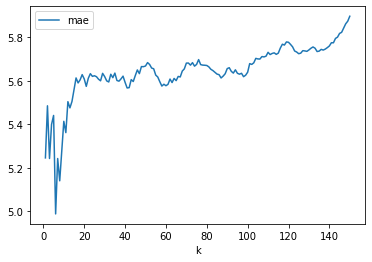

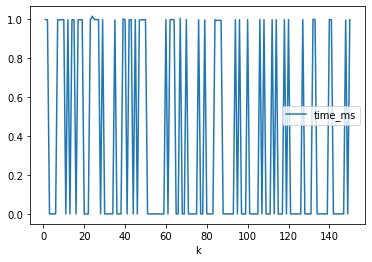

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "KNN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'RefSt': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["RefSt"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["KNN_Pred"].corr(x)
print("Correlation: ", corr)

         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
261   3.352684  32.988701  34.780000  47.339710  11.794779      9.558679   
262   7.728218  55.011299  40.833618  33.277778  25.163334     22.023218   
263  14.564075  65.508571  32.245977  56.434195  34.034277     30.089609   
264   7.223171  48.565657  29.370145  63.183478  23.545887     20.228234   
265   3.556766  33.050847  35.026048  41.859581  10.205982      9.055297   
..         ...        ...        ...        ...        ...           ...   
322   7.004743  43.855114  36.249425  52.779023  21.464585     16.853196   
323  15.555511  54.378531  41.898271  38.882997  27.251262     22.298464   
324  11.403190  46.968839  34.132113  58.198873  23.894915     19.132447   
325   3.978614  35.509915  31.692015  64.261977  16.977483     12.576146   
326   9.571165  60.005650  33.561563  46.583750  28.123969     25.836321   

      KNN_Pred    RF_Pred  
261   9.656463   9.806989  
262  14.759448  22.407917  
263

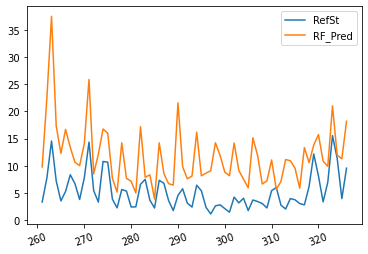

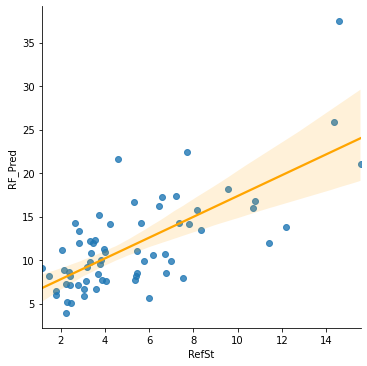

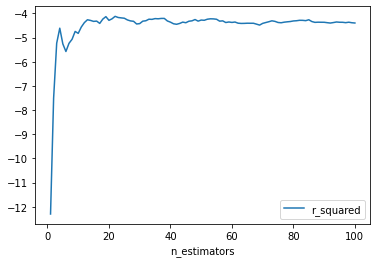

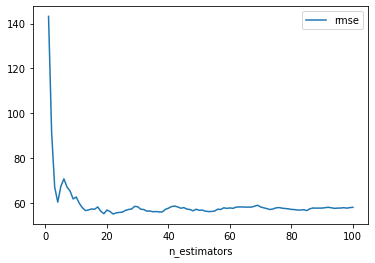

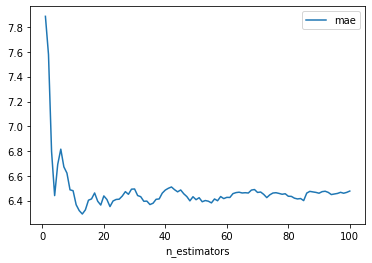

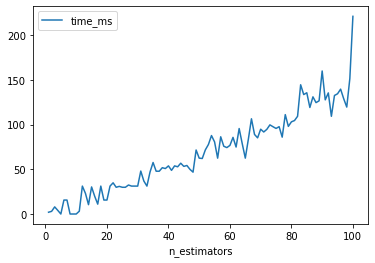

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "RF_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'RefSt': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["RefSt"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

Loss functions:
* R-squared = -2.4024735346934096
* RMSE = 36.64282497607394
* MAE = 5.286188133681661
Loss functions:
* R-squared = -3.212812236258909
* RMSE = 45.369740530313265
* MAE = 5.800196602130519
Correlation:  1 0.9076172523781074
Correlation:  2 0.9108744381270445
Correlation:  3 0.8325191343543871
Correlation:  4 0.7864552880195042
Correlation:  5 0.639921545269257
Correlation:  6 0.36792026068285605
Correlation:  7 0.4710980228874917
Correlation:  8 0.2882731475887979
Correlation:  9 0.27124904378131237
Correlation:  10 0.002265097329937081
Correlation:  11 -0.035498937827420536
Correlation:  12 -0.03717892323691093
Correlation:  13 -0.04460676284322799
Correlation:  14 0.019153949108627527
Correlation:  15 0.022667999722501227
Correlation:  16 0.024660492985100136
Correlation:  17 0.026234645390851376
Correlation:  18 0.028144523020978005
Correlation:  19 0.008087971691319244
Correlation:  20 -0.023359269220601445


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.56599e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.11805e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.3145e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.96751e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarn

Correlation:  21 -0.02490813066553207
Correlation:  22 -0.025465793605335817
Correlation:  23 -0.02575236860855924
Correlation:  24 -0.025936244047575045
Correlation:  25 -0.026072425677574913
           r_squared          rmse           mae  time_ms
degree                                                   
1      -6.582964e+00  8.166448e+01  7.895658e+00    0.000
2      -4.240725e+00  5.643982e+01  6.695659e+00    0.000
3      -4.176002e+00  5.574278e+01  6.470992e+00    3.989
4      -3.212812e+00  4.536974e+01  5.800197e+00    3.989
5      -6.165470e+00  7.716829e+01  6.911824e+00    5.984
6      -3.828607e+01  4.230900e+02  9.895004e+00    5.984
7      -3.874994e+01  4.280856e+02  1.063685e+01    5.985
8      -1.338450e+02  1.452209e+03  1.322160e+01    3.991
9      -1.070600e+02  1.163748e+03  1.339014e+01    3.990
10     -8.011947e+02  8.639209e+03  3.092746e+01    3.989
11     -2.237326e+04  2.409589e+05  1.079092e+02    4.985
12     -8.949562e+04  9.638308e+05  1.986107e+02    4

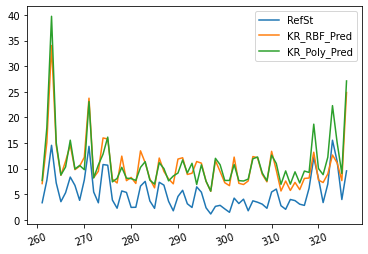

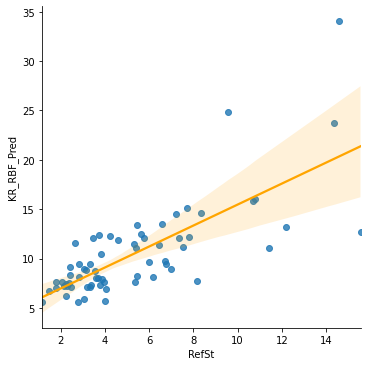

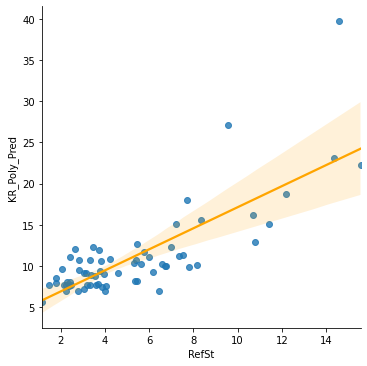

In [5]:
# %%
# Kernel Regression
# from sklearn_extensions.kernel_regression import KernelRegression
from sklearn.kernel_ridge import KernelRidge

# Models
kr_rbf = KernelRidge(kernel = "rbf")
kr_poly = KernelRidge(kernel = "poly", degree = 4)

# Fit
kr_rbf.fit(X_train, Y_train)
kr_poly.fit(X_train, Y_train)

# Predict
df_test["KR_RBF_Pred"] = kr_rbf.predict(X_test)
df_test["KR_Poly_Pred"] = kr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "KR_RBF_Pred", "KR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'KR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'KR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["KR_Poly_Pred"])


# %%
# Polynomial Kernel Regression stats vs. hyperparameters
def kr_stats():
    kr_aux = pd.DataFrame({'RefSt': Y_test})

    degree = [*range(1, 26, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in degree:
        kr = KernelRidge(kernel = "poly", degree = i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        kr.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        kr_aux["KR_Pred"] = kr.predict(X_test)
        x = df["RefSt"].tolist()
        x = pd.Series(x)
        corr = kr_aux["KR_Pred"].corr(x)
        print("Correlation: ",i, corr)
#         print("type",type(kr_aux["KR_Pred"]))

        # Loss
        r_squared.append(r2_score(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        rmse.append(mean_squared_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        mae.append(mean_absolute_error(kr_aux["RefSt"], kr_aux["KR_Pred"]))
        time_ms.append(execution_time)

    kr_stats = pd.DataFrame({'degree': degree, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    kr_stats = kr_stats.set_index('degree') # index column (X axis for the plots)
    print(kr_stats)

#     # plot
#     kr_stats[["r_squared"]].plot()
#     kr_stats[["rmse"]].plot()
#     kr_stats[["mae"]].plot()
#     kr_stats[["time_ms"]].plot()

kr_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr_poly = df_test["KR_Poly_Pred"].corr(x)
corr_rbf = df_test["KR_RBF_Pred"].corr(x)
print("Correlation_poly: ", corr_poly)
print("Correlation_rbf: ", corr_rbf)

RBF params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = -6.010742623942978
* RMSE = 75.50195829652266
* MAE = 8.18240573280056
Loss functions:
* R-squared = -4.

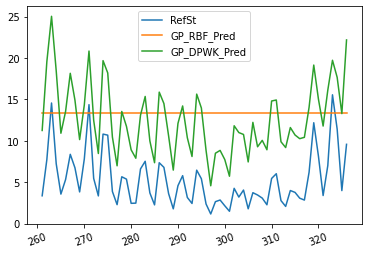

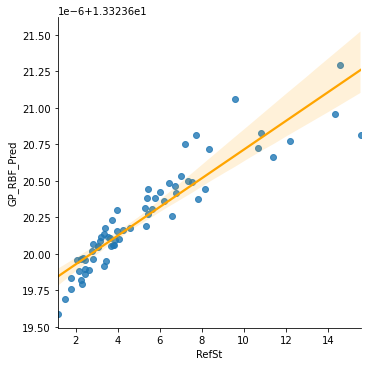

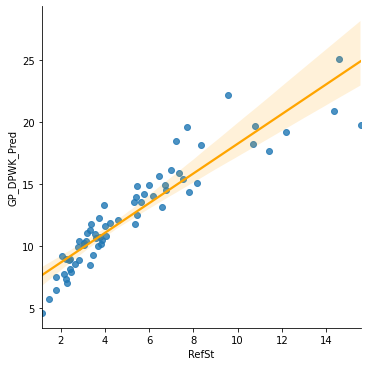

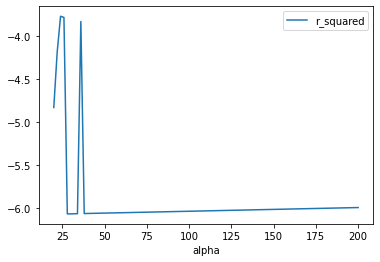

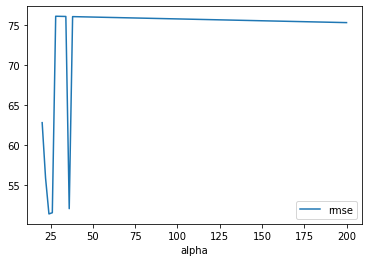

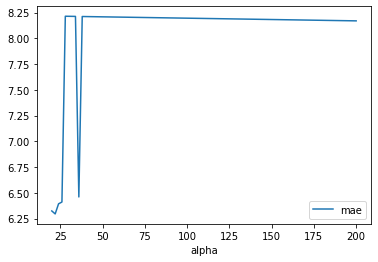

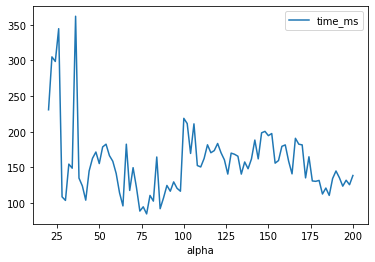

In [6]:


# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 150, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_rbf.fit(X_train, Y_train)
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test)
df_test["GP_DPWK_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["RefSt", "GP_RBF_Pred", "GP_DPWK_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'GP_DPWK_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["GP_DPWK_Pred"])


# %%
# Gaussian Process stats vs. hyperparameters
def gp_stats():
    gp_aux = pd.DataFrame({'RefSt': Y_test})

    alpha = [*range(20, 202, 2)]
    # alpha = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50,100,150,200]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    rbf = ConstantKernel() * RBF()

    for i in alpha:
        gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = i, random_state = 0)
        # gp = GaussianProcessRegressor(kernel=rbf, alpha=i, random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        gp_rbf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        gp_aux["GP_RBF_Pred"] = gp_rbf.predict(X_test)

        # Loss
        r_squared.append(r2_score(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        rmse.append(mean_squared_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        mae.append(mean_absolute_error(gp_aux["RefSt"], gp_aux["GP_RBF_Pred"]))
        time_ms.append(execution_time)

    gp_stats = pd.DataFrame({'alpha': alpha, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    gp_stats = gp_stats.set_index('alpha') # index column (X axis for the plots)
    print(gp_stats)

    # plot
    gp_stats[["r_squared"]].plot()
    gp_stats[["rmse"]].plot()
    gp_stats[["mae"]].plot()
    gp_stats[["time_ms"]].plot()

gp_stats()

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["GP_RBF_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -7.664224869389994
* RMSE = 93.30908005755062
* MAE = 6.533507201795313
Loss functions:
* R-squared = -1.7584238262857697
* RMSE = 29.706753174063834
* MAE = 5.152063397019685
Loss functions:
* R-squared = -1.860687144983098
* RMSE = 30.808074565777854
* MAE = 5.060103510273947
         RefSt  Sensor_O3       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
261   3.352684  32.988701  34.780000  47.339710  11.794779      9.558679   
262   7.728218  55.011299  40.833618  33.277778  25.163334     22.023218   
263  14.564075  65.508571  32.245977  56.434195  34.034277     30.089609   
264   7.223171  48.565657  29.370145  63.183478  23.545887     20.228234   
265   3.556766  33.050847  35.026048  41.859581  10.205982      9.055297   
..         ...        ...        ...        ...        ...           ...   
322   7.004743  43.855114  36.249425  52.779023  21.464585     16.853196   
323  15.555511  54.378531  41.898271  38.882997  27.251262     22.298464   
324  11

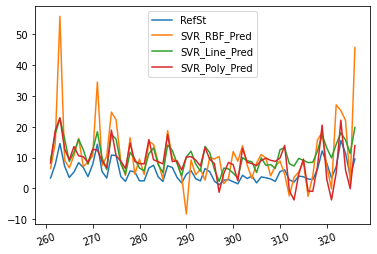

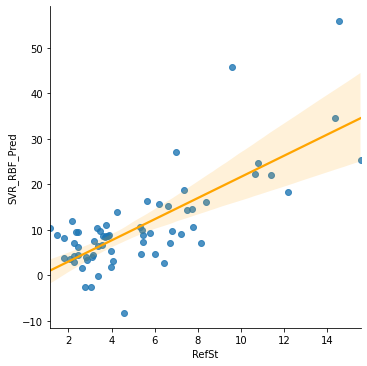

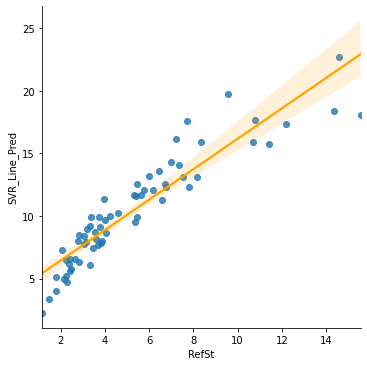

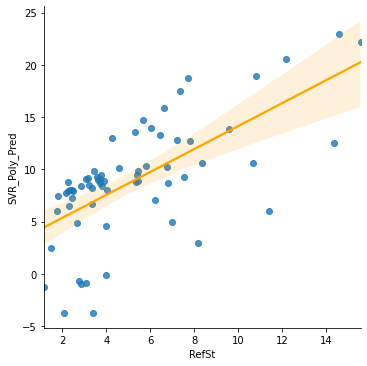

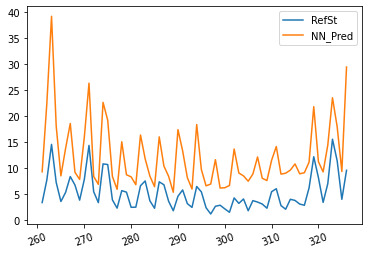

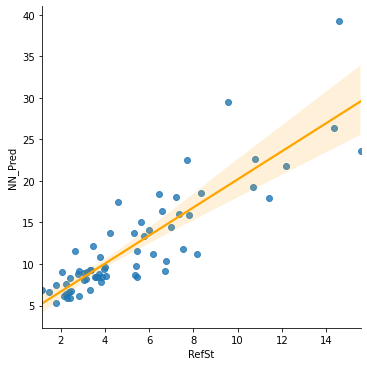

In [7]:


# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Line_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["RefSt", "SVR_RBF_Pred", "SVR_Line_Pred", "SVR_Poly_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Line_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'RefSt', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Line_Pred"])
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["SVR_Poly_Pred"])


# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)

In [ ]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 750)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["RefSt", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'RefSt', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["RefSt"], y_pred = df_test["NN_Pred"])

x = df["RefSt"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)

2.10.0
Epoch 1/750
27/27 [==============================] - 1s 2ms/step - loss: 305.9680
Epoch 2/750
27/27 [==============================] - 0s 3ms/step - loss: 141.0447
Epoch 3/750
27/27 [==============================] - 0s 3ms/step - loss: 70.7279
Epoch 4/750
27/27 [==============================] - 0s 3ms/step - loss: 64.3192
Epoch 5/750
27/27 [==============================] - 0s 2ms/step - loss: 62.2946
Epoch 6/750
27/27 [==============================] - 0s 3ms/step - loss: 59.6224
Epoch 7/750
27/27 [==============================] - 0s 2ms/step - loss: 63.9719
Epoch 8/750
27/27 [==============================] - 0s 2ms/step - loss: 60.4290
Epoch 9/750
27/27 [==============================] - 0s 2ms/step - loss: 60.7512
Epoch 10/750
27/27 [==============================] - 0s 3ms/step - loss: 58.6960
Epoch 11/750
27/27 [==============================] - 0s 2ms/step - loss: 59.1246
Epoch 12/750
27/27 [==============================] - 0s 2ms/step - loss: 60.6170
Epoch 13/750
27/

27/27 [==============================] - 0s 2ms/step - loss: 23.0635
Epoch 199/750
27/27 [==============================] - 0s 2ms/step - loss: 23.4712
Epoch 200/750
27/27 [==============================] - 0s 3ms/step - loss: 22.1287
Epoch 201/750
27/27 [==============================] - 0s 2ms/step - loss: 24.6588
Epoch 202/750
27/27 [==============================] - 0s 2ms/step - loss: 24.5455
Epoch 203/750
27/27 [==============================] - 0s 2ms/step - loss: 25.3815
Epoch 204/750
27/27 [==============================] - 0s 2ms/step - loss: 22.3088
Epoch 205/750
27/27 [==============================] - 0s 2ms/step - loss: 23.7016
Epoch 206/750
27/27 [==============================] - 0s 2ms/step - loss: 24.3036
Epoch 207/750
27/27 [==============================] - 0s 2ms/step - loss: 24.2865
Epoch 208/750
27/27 [==============================] - 0s 2ms/step - loss: 23.5830
Epoch 209/750
27/27 [==============================] - 0s 2ms/step - loss: 23.2646
Epoch 210/750
27/2